In [1]:
import sys

sys.path.append("..")

In [2]:
from src.preprocessing import Preprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as pta
from sklearn.preprocessing import robust_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.transformations.series.lag import Lag
import statsmodels.api as sm
from datetime import datetime

e:\veighna_elite\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df = pd.read_csv("../data/data.csv", index_col='datetime', parse_dates=True)
df.drop(columns=["symbol", "exchange", "turnover", "open_interest"], inplace=True)

In [7]:
pp = Preprocessor(df, 10)

In [8]:
pp.prepare_target()

Generating targets


In [10]:
y = pp.y

In [11]:
y = y[X.index]

In [12]:
y.shape, X.shape

((379236,), (379236, 43))

In [14]:
y.to_hdf("2023-09-03.h5", key="y")

In [5]:
X = pd.read_hdf("2023-09-03.h5", key="X")

In [4]:
pp = Preprocessor(X, 10)

In [5]:
pp.X = X

In [7]:
pp.generate_cossin_time_feaures()

Generating cossin time features...
Cossin time features generated


In [17]:
X, y = pp.prep()

Generating targets
Generating features...
Generating TA features...


In [11]:
pp.save()

In [16]:
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, validation_curve

In [44]:
model = HistGradientBoostingRegressor(
    learning_rate=0.1, 
    max_leaf_nodes=None,
    warm_start=True, 
    verbose=3, 
    early_stopping=False,
    max_iter=1000,
    min_samples_leaf=1000,
    )

In [37]:
kf = KFold(n_splits=20, shuffle=True, random_state=42)

In [58]:
space = np.zeros(100)
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)
    model = HistGradientBoostingRegressor(
        learning_rate=0.1, 
        max_leaf_nodes=None,
        warm_start=True, 
        early_stopping=False,
        max_iter=i*100,
        min_samples_leaf=1000,
    )
    model.fit(X_train, y_train)
    space[i] = model.score(X_test, y_test)

Text(0.5, 0, 'n_estimators')

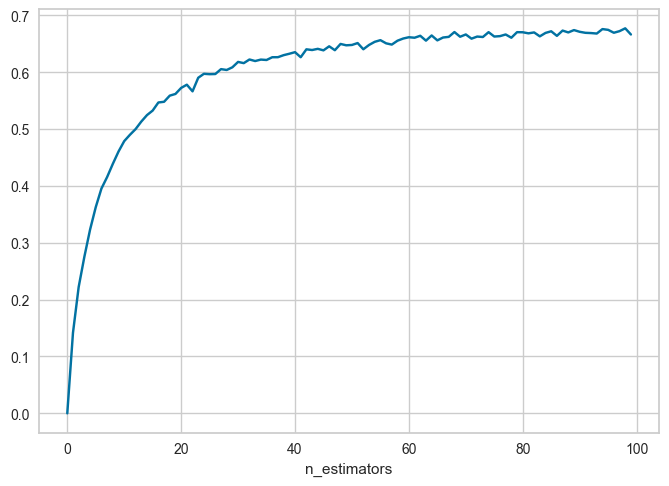

In [62]:
plt.plot(space)
plt.xlabel("n_estimators")

In [17]:
space = np.zeros(100)
for i in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)
    model = HistGradientBoostingRegressor(
        learning_rate=0.01 * i, 
        max_leaf_nodes=None,
        warm_start=True, 
        early_stopping=False,
        max_iter=6000,
        min_samples_leaf=1000,
    )
    model.fit(X_train, y_train)
    space[i] = model.score(X_test, y_test)
plt.plot(space)

  File "e:\veighna_elite\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


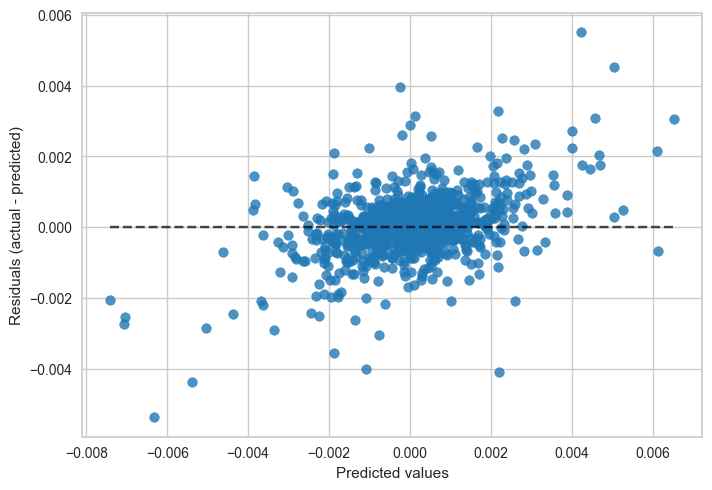

In [56]:
display = PredictionErrorDisplay.from_estimator(model, X, y)

In [46]:
scores

array([0.61850078, 0.62666175, 0.61981391, 0.62342523, 0.61431982,
       0.63357467, 0.62069058, 0.6276679 , 0.61966662, 0.6325897 ,
       0.60757762, 0.62516595, 0.62031132, 0.6341174 , 0.63429506,
       0.62172401, 0.63293628, 0.63305527, 0.61216336, 0.62785136])